# Ініціалізація датасету

В датасеті записана інформація про стан атмосфери в місті Єна(Німеччина).

Дані взяті з https://www.kaggle.com/pankrzysiu/weather-archive-jena

Columns

1.   Date Time
2.p (mbar)atmospheric pressure
3.T (degC)temperature
4.Tpot (K)potential temperature
5.Tdew (degC)dew point temperature
6.rh (%)relative humidity
7.VPmax (mbar)saturation water vapor pressure
8.VPact (mbar)actual water vapor pressure
9.VPdef (mbar)water vapor pressure deficit
10.sh (g/kg)specific humidity
11.H2O (mmol/mol)water vapor concentration
12.rho (g/m**3)air density
13.wv (m/s)wind velocity
14.max. wv (m/s)maximum 
15.wd_(deg) wind velocity

In [0]:
# підключимо бібліотеку pandas для обробки даних (вона вже встановлена в Colab)
import pandas as pd

# зазначимо url звідки ми візьмемо дані
url = "https://raw.githubusercontent.com/Aarrtteemm123/dataset-weather/master/jena_climate_2009_2016.csv"

# створимо pandas Dataframe з csv-файлу, який ми отримаємо по вищезазначеному url
# Dataframe надасть нам необхідні можливості для обробки даних
df = pd.read_csv(url)

# відобразимо перші 5 записів у датафреймі (достатньо, щоб побачити структуру записів у ньому)
df.head()

,Date_Time,p_(mbar),T_(degC),Tpot_(K),Tdew_(degC),rh (%),Vpmax_(mbar),Vpact_(mbar),Vpdef_(mbar),sh_(g/kg),H2OC_(mmol/mol),rho_(g/m**3),wv_(m/s),max._wv_(m/s),wd_(deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


# T-розподіл 

Text(3, 0.35, 'Second')

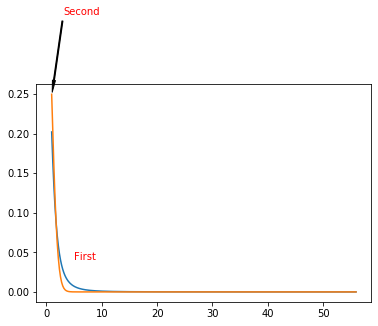

In [0]:
#T-розподіл 
# import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

# Знаходимо мінімальне та максимальне значення в колонці "Vpmax_(mbar)"
minValue = df['Vpmax_(mbar)'].min()
maxValue = df['Vpmax_(mbar)'].max()

#T-розподіл будемо виконувати від minValue до maxValue збільшуючи значення на 0.1
x = np.arange(minValue,maxValue,0.1)


tvals1 = stats.t.pdf(x,2)
tvals2 = stats.t.pdf(x,30)

plt.plot(x,tvals1,x,tvals2)
plt.text(5,0.04,"First",color = "red")
plt.annotate("Second",xy=(1,0.25),xytext = (3,0.35),arrowprops=dict(facecolor="black",shrink=0.025,width=1,headwidth=3),color="red")

# t - критерій Стьюдента

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:5261: RuntimeWarning: overflow encountered in power
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:5261: RuntimeWarning: overflow encountered in multiply
  Px /= np.sqrt(r*np.pi)*(1+(x**2)/r)**((r+1)/2)


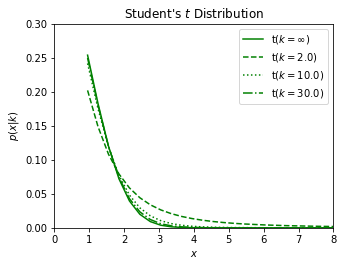

In [0]:
import numpy as np
from scipy.stats import t as student_t
from matplotlib import pyplot as plt

#------------------------------------------------------------
# Define the distribution parameters to be plotted
mu = 0
k_values = [1E10, 2, 10, 30]
linestyles = ['-', '--', ':', '-.']
# x = np.linspace(-10, 10, 1000)
minValue = df['Vpmax_(mbar)'].min()
maxValue = df['Vpmax_(mbar)'].max()

#T-розподіл будемо виконувати від minValue до maxValue збільшуючи значення на 0.1
x = np.arange(minValue,maxValue,0.3)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for k, ls in zip(k_values, linestyles):
    dist = student_t(k, 0)

    if k >= 1E10:
        label = r'$\mathrm{t}(k=\infty)$'
    else:
        label = r'$\mathrm{t}(k=%.1f)$' % k

    plt.plot(x, dist.pdf(x), ls=ls, c='green', label=label)

plt.xlim(0, 8)
plt.ylim(0.0, 0.30)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k)$')
plt.title("Student's $t$ Distribution")

plt.legend()
plt.show()

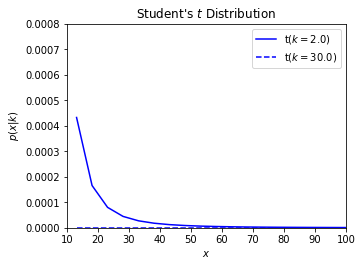

In [0]:
 # import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats

averageVpmax = df['Vpmax_(mbar)'].mean()
averageTpot = df['Tpot_(K)'].mean()


x = np.arange(averageVpmax,averageTpot,5)


mu = 0
k_values = [2, 30]
linestyles = ['-', '--', ':', '-.']


fig, ax = plt.subplots(figsize=(5, 3.75))

for k, ls in zip(k_values, linestyles):
    dist = student_t(k, 0)

    if k >= 1E10:
        label = r'$\mathrm{t}(k=\infty)$'
    else:
        label = r'$\mathrm{t}(k=%.1f)$' % k

    plt.plot(x, dist.pdf(x), ls=ls, c='blue', label=label)

plt.xlim(10, 100)
plt.ylim(0.0, 0.0008)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|k)$')
plt.title("Student's $t$ Distribution")

plt.legend()
plt.show()

# QQ - plot

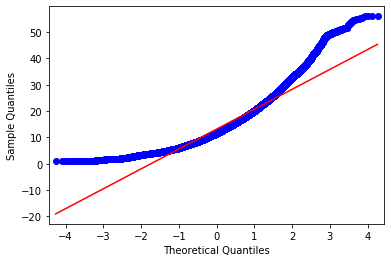

In [0]:
import numpy as np 
import pylab 
import scipy.stats as stats
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

y = df['Vpmax_(mbar)'].tolist()

X = np.array(y)

#stats.probplot(y, dist="norm", plot=pylab)

qqplot(X,line='s')
pyplot.show()

# ANOVA

In [0]:
import pandas as pd
import scipy.stats as stats

#Заміняємо NaN на 0.0
df['Vpmax_(mbar)'].fillna(0.0,inplace=True)
df['Tpot_(K)'].fillna(0.0,inplace=True)
samples=[list(frame) for group,frame in df.groupby('Tpot_(K)')['Vpmax_(mbar)']]
stats.f_oneway(*samples)
#pvalue вийшло нульове тому що існує зв'язок між цими величинами і данних для порівняння досить багато

F_onewayResult(statistic=4347.643879538278, pvalue=0.0)

# T-test

In [0]:
#T-test
from scipy.stats import ttest_ind

cat1 = df[df['Vpmax_(mbar)']==4.7]
cat2 = df[df['Vpmax_(mbar)']==4.3]

ttest_ind(cat1['Vpmax_(mbar)'], cat2['Vpmax_(mbar)'])

Ttest_indResult(statistic=1978767084319154.2, pvalue=0.0)

# KS-test

In [0]:
#KS-test
from scipy.stats import ks_2samp
import numpy as np

x = df['Vpmax_(mbar)'].tolist()
y = df['Tpot_(K)'].tolist()

ks_2samp(x, y)

Ks_2sampResult(statistic=1.0, pvalue=0.0)

Чим ближче значення p до 0, тим більша ймовірність того, що два зразки були взяті з одного і того ж розподілу.

# Відповіді на запитання до теми "ЕМПІ №6-7: Порівняння середніх v2019"

> 1.При порівнянні двох середніх використовується t-критерій Стьюдента. Метою його застосування є знаходження відмінності між двома середніми значеннями якоїсь вибірки.

> При цих порівняннях застосоються такі бібліотеки Pyhon як: scipy, numpy.